In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [53]:

icici = pd.read_csv(r"E:\Work\Machine learning\Logbinary\Data\ICICIBANK.BO.csv")
icici.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,13.6364,13.7364,13.0909,13.7364,2.877864,2611840.0
1,2000-01-04,14.4454,14.6182,13.1454,13.3909,2.805480,1544648.0
2,2000-01-05,13.1818,13.4545,12.3273,12.6000,2.639781,2402120.0
3,2000-01-06,12.7273,13.5091,12.5455,12.5727,2.634061,1404452.0
4,2000-01-07,12.0273,12.7273,11.8182,12.0000,2.514077,2163958.0


In [54]:
icici['Date'] = pd.to_datetime(icici['Date'])
icici.index = icici['Date']
icici.index.name = None

In [55]:
icici.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4983 entries, 2000-01-03 to 2020-06-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4983 non-null   datetime64[ns]
 1   Open       4982 non-null   float64       
 2   High       4982 non-null   float64       
 3   Low        4982 non-null   float64       
 4   Close      4982 non-null   float64       
 5   Adj Close  4982 non-null   float64       
 6   Volume     4982 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 311.4 KB


In [56]:
icici['Date'] = pd.to_datetime(icici['Date'])

In [57]:
icici.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4983 entries, 2000-01-03 to 2020-06-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4983 non-null   datetime64[ns]
 1   Open       4982 non-null   float64       
 2   High       4982 non-null   float64       
 3   Low        4982 non-null   float64       
 4   Close      4982 non-null   float64       
 5   Adj Close  4982 non-null   float64       
 6   Volume     4982 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 311.4 KB


In [58]:
icici.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [59]:
icici.dropna(axis=0,inplace=True)

In [60]:
icici.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [61]:
icici.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4982 entries, 2000-01-03 to 2020-06-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4982 non-null   datetime64[ns]
 1   Open       4982 non-null   float64       
 2   High       4982 non-null   float64       
 3   Low        4982 non-null   float64       
 4   Close      4982 non-null   float64       
 5   Adj Close  4982 non-null   float64       
 6   Volume     4982 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 311.4 KB


In [62]:
output_var = pd.DataFrame(icici['Close'])
#Selecting the Features
features = ['Adj Close', 'High', 'Low', 'Volume','Open']

In [63]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(icici[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=icici.index)
feature_transform.head()

,Adj Close,High,Low,Volume,Open
2000-01-03,0.000665,0.001870,0.002397,0.004559,0.002991
2000-01-04,0.000533,0.003504,0.002500,0.002696,0.004495
2000-01-05,0.000230,0.001347,0.000959,0.004193,0.002146
2000-01-06,0.000219,0.001449,0.001370,0.002451,0.001301
2000-01-07,0.000000,0.000000,0.000000,0.003777,0.000000


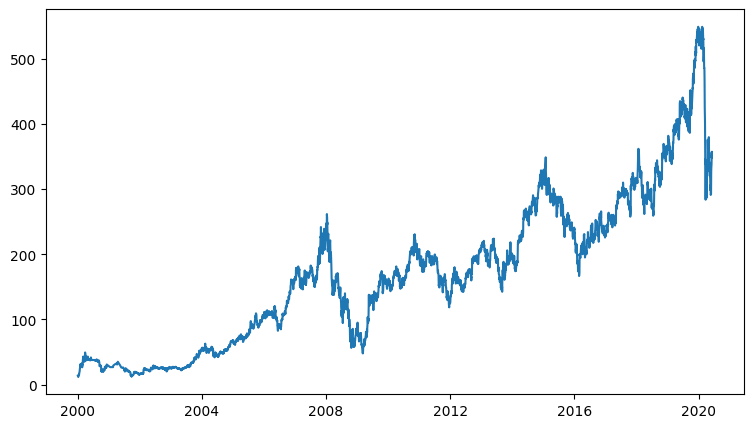

In [64]:
plt.figure(figsize=(9,5))
plt.plot('Close',data=icici)

In [65]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [66]:
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0],1,X_test.shape[1])

In [67]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [68]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

c:\Users\ommak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
lstm.fit(X_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 29639.4453
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28838.4375
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29198.8203
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28002.1855
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27181.9199
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24808.9746
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23139.1309
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20495.4453
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18025.7109
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15895.5449
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12676.5791
Epoch 12/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10758.3545
Epoch 13/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8547.3848
Epoch 14/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6996.8418
Epoch 15/100
71/7

In [70]:
y_pred = lstm.predict(X_test)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


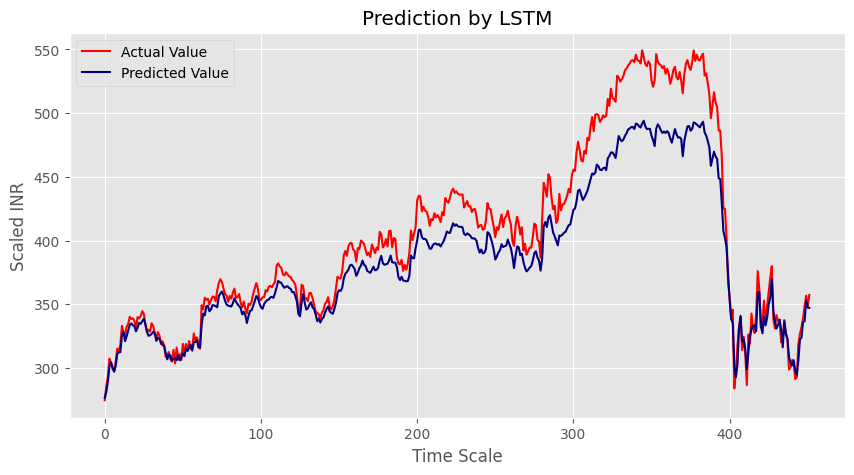

In [71]:
plt.style.use(style='ggplot')
plt.figure(figsize=(10,5),)
plt.plot(y_test,color='red', label='Actual Value')
plt.plot(y_pred,color='navy', label='Predicted Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled INR')
plt.legend()
plt.show()

In [72]:
icici = icici['Close'].values.reshape(-1,1)

In [73]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(icici)

In [74]:
def create_dataset(data, time_step):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [75]:
time_step_day = 1
time_step_week = 7
time_step_month = 30

X_day, Y_day = create_dataset(data, time_step_day)
X_week, Y_week = create_dataset(data, time_step_week)
X_month, Y_month = create_dataset(data, time_step_month)

## predicting for One day interval

In [76]:
train_size_day= int(len(X_day) * 0.7)
test_size_day = len(X_day) - train_size_day

In [77]:
train_X_day, test_X_day = X_day[:train_size_day], X_day[train_size_day:]
train_Y_day, test_Y_day = Y_day[:train_size_day], Y_day[train_size_day:]

In [78]:
train_X_day = train_X_day.reshape(train_X_day.shape[0], train_X_day.shape[1], 1)
test_X_day = test_X_day.reshape(test_X_day.shape[0], test_X_day.shape[1], 1)

In [79]:
model_day= Sequential()
model_day.add(LSTM(units=50, return_sequences=True, input_shape=(time_step_day, 1)))
model_day.add(LSTM(units=50))
model_day.add(Dense(units=1))
model_day.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ommak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
model_day.fit(train_X_day, train_Y_day, epochs=100, batch_size=64)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0326
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9719e-05
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1105e-05
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6028e-05
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3598e-05
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3950e-05
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8200e-05
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2188e-05
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7852e-05
Epoch 12/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8089e-05
Epoch 13/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7783e-05
Epoch 14/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4141e-05
Epoch 15/100
55/55 ━━━━━━━━

In [81]:
predictions_day = model_day.predict(test_X_day)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [82]:
predictions_day = scaler.inverse_transform(predictions_day)
test_Y_day = scaler.inverse_transform(test_Y_day.reshape(-1,1))

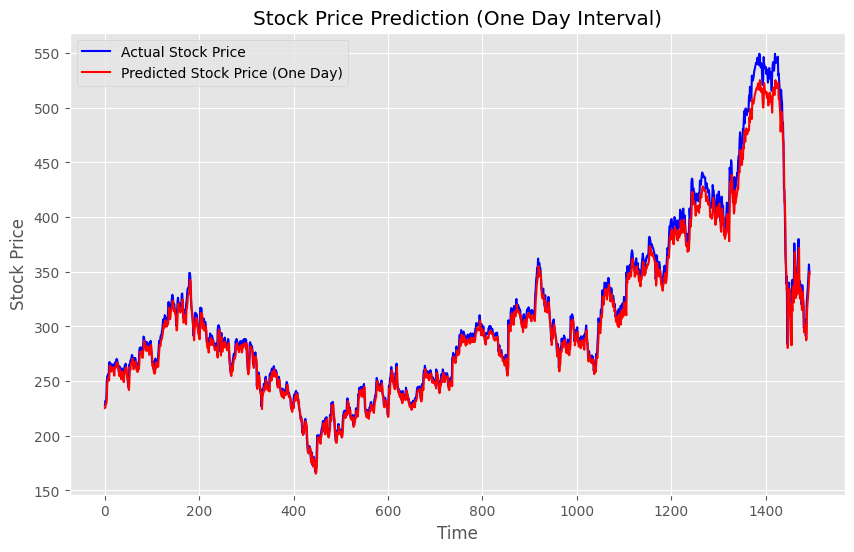

In [83]:
plt.style.use(style='ggplot')
plt.figure(figsize=(10,6))
plt.plot(test_Y_day, color='blue', label='Actual Stock Price')
plt.plot(predictions_day, color='red', label='Predicted Stock Price (One Day)')
plt.title('Stock Price Prediction (One Day Interval)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## predicting as One Week interval

In [84]:
train_size_week = int(len(X_week) * 0.7)
test_size_week = len(X_week) - train_size_week


train_X_week, test_X_week = X_week[:train_size_week], X_week[train_size_week:]
train_Y_week, test_Y_week = Y_week[:train_size_week], Y_week[train_size_week:]


In [85]:
train_X_week = train_X_week.reshape(train_X_week.shape[0], train_X_week.shape[1], 1)
test_X_week = test_X_week.reshape(test_X_week.shape[0], test_X_week.shape[1], 1)


In [86]:
model_week = Sequential()
model_week.add(LSTM(units=50, return_sequences=True, input_shape=(time_step_week, 1)))
model_week.add(LSTM(units=50, return_sequences=True))
model_week.add(LSTM(units=50))
model_week.add(Dense(units=1))
model_week.compile(optimizer='adam', loss='mean_squared_error')

# Train the models for one day, one week, and one month prediction intervals
model_week.fit(train_X_week, train_Y_week, epochs=100, batch_size=64)

Epoch 1/100


c:\Users\ommak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0185
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2395e-04
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8942e-04
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6618e-04
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5900e-04
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6823e-04
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6098e-04
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6453e-04
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6273e-04
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6510e-04
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5108e-04
Epoch 12/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6968e-04
Epoch 13/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6698e-04
Epoch 14/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6647e-04
Epoch 15/100
55/55 ━

In [87]:
predictions_week = model_week.predict(test_X_week)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [88]:
predictions_week = scaler.inverse_transform(predictions_week)
test_Y_week = scaler.inverse_transform(test_Y_week.reshape(-1,1))

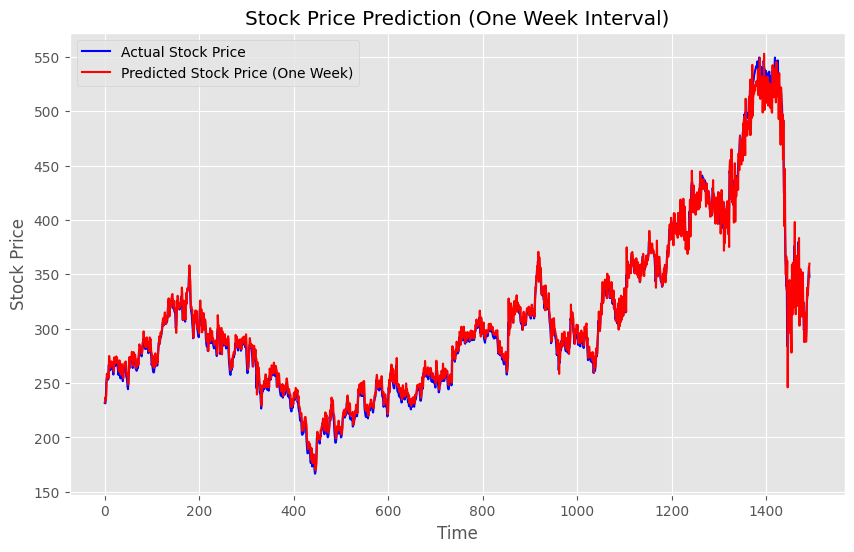

In [89]:
plt.style.use(style='ggplot')
plt.figure(figsize=(10,6))
plt.plot(test_Y_week, color='blue', label='Actual Stock Price')
plt.plot(predictions_week, color='red', label='Predicted Stock Price (One Week)')
plt.title('Stock Price Prediction (One Week Interval)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Predicting as One Month interval

In [90]:
train_size_month = int(len(X_month) * 0.7)
test_size_month = len(X_month) - train_size_month

In [91]:
train_X_month, test_X_month = X_month[:train_size_month], X_month[train_size_month:]
train_Y_month, test_Y_month = Y_month[:train_size_month], Y_month[train_size_month:]

In [92]:
train_X_month = train_X_month.reshape(train_X_month.shape[0], train_X_month.shape[1], 1)
train_X_month = train_X_month.reshape(train_X_month.shape[0], train_X_month.shape[1], 1)

In [93]:
model_month = Sequential()
model_month.add(LSTM(units=50, return_sequences=True, input_shape=(time_step_month, 1)))
model_month.add(LSTM(units=50, return_sequences=True))
model_month.add(LSTM(units=50))
model_month.add(Dense(units=1))
model_month.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ommak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [94]:
model_month.fit(train_X_month, train_Y_month, epochs=100, batch_size=80)

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0106
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 3.4514e-04
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 2.9958e-04
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 2.9170e-04
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 2.6017e-04
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 2.7734e-04
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.3405e-04
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.0792e-04
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 2.2029e-04
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 2.4755e-04
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.9746e-04
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 1.8339e-04
Epoch 13/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 1.9368e-04
Epoch 14/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.9061e-04
Epoch

In [95]:
predictions_month = model_month.predict(test_X_month)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [96]:
predictions_month = scaler.inverse_transform(predictions_month)
test_Y_month = scaler.inverse_transform(test_Y_month.reshape(-1,1))

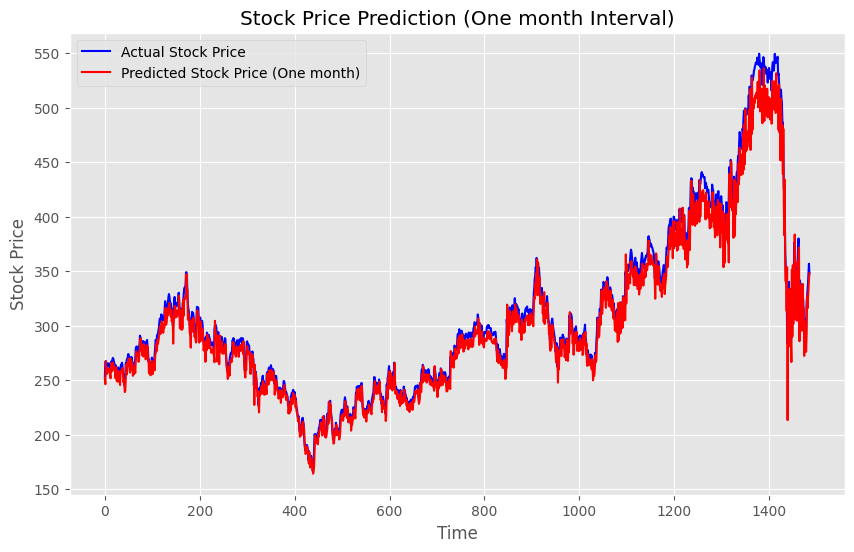

In [97]:
plt.figure(figsize=(10,6))
plt.plot(test_Y_month, color='blue', label='Actual Stock Price')
plt.plot(predictions_month, color='red', label='Predicted Stock Price (One month)')
plt.title('Stock Price Prediction (One month Interval)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [98]:
model_day.save('model_day.h5')
model_week.save('model_week.h5')
model_month.save('model_month.h5')

In [99]:
from keras.models import load_model

In [100]:
from keras.models import load_model
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load models
model_day = load_model('model_day.h5')
model_week = load_model('model_week.h5')
model_month = load_model('model_month.h5')

recent_prices = [150, 152, 153, 155, 157, 160, 162, 165, 167, 169, 170, 172, 175, 178, 180,
                 182, 185, 187, 190, 192, 195, 197, 200, 202, 205, 207, 210, 212, 215, 217,
                 220, 222, 225, 227, 230, 232, 235, 237, 240, 242, 245]

recent_prices_array = np.array(recent_prices).reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(recent_prices_array)

recent_prices_normalized = scaler.transform(recent_prices_array)


recent_prices_reshaped = recent_prices_normalized.reshape(-1, 1)
# day
next_day_input = recent_prices_reshaped[-1].reshape(1, 1, 1)
predicted_day_normalized = model_day.predict(next_day_input)
predicted_day = scaler.inverse_transform(predicted_day_normalized)
print("Predicted stock price for the next day:", predicted_day[0][0])

#week
predicted_week = []
for i in range(7):
    next_day_input = recent_prices_normalized[-7:].reshape(1, 7, 1)
    predicted_day_normalized = model_week.predict(next_day_input)
    predicted_day = scaler.inverse_transform(predicted_day_normalized)
    predicted_week.append(predicted_day[0][0])
    recent_prices_normalized = np.concatenate((recent_prices_normalized, predicted_day_normalized), axis=0)

print("Predicted stock prices for the next week:", predicted_week)

#month
predicted_month = []
for i in range(30):
    next_day_input = recent_prices_normalized[-30:].reshape(1, 30, 1)
    predicted_day_normalized = model_month.predict(next_day_input)
    predicted_day = scaler.inverse_transform(predicted_day_normalized)
    predicted_month.append(predicted_day[0][0])
    recent_prices_normalized = np.concatenate((recent_prices_normalized, predicted_day_normalized), axis=0)

print("Predicted stock prices for the next month:", predicted_month)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Predicted stock price for the next day: 240.72948
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted stock prices for the next week: [244.30757, 237.90903, 228.59753, 221.11328, 218.38667, 220.11507, 224.06355]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━